In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load data
raw_data = pd.read_csv('epi_r.csv')

In [3]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [4]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

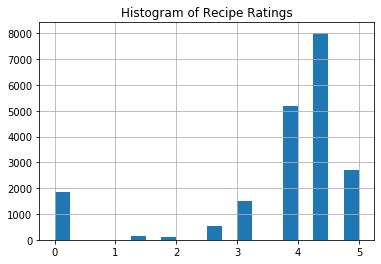

In [5]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [6]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [7]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = raw_data.rating.sample(frac=0.3, replace=True, random_state=1)
svr.fit(X,Y)

C:\Users\rkies\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

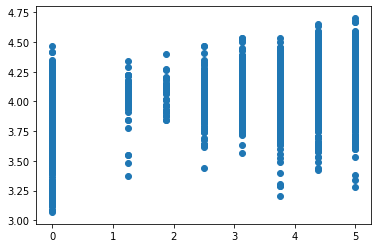

In [8]:
plt.scatter(Y, svr.predict(X))

In [9]:
svr.score(X, Y)

-0.003978314483867651

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

C:\Users\rkies\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\rkies\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\rkies\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\rkies\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

array([-0.01787926, -0.02916288, -0.02841122, -0.03767394, -0.01735362])

In [11]:
#define variable to use for binary classifier
raw_data['high_rating'] = raw_data['rating'] > 3.5

In [12]:
#select most valuable features
raw_data[['high_rating', 'alcoholic', 'bon appétit', 'cocktail party', 'drink', 'gin', 'house & garden', 'cocktail',
          'spirit', 'bitters', 'harpercollins', 'rum', 'bake','roast','sauté', 'soy free',  'condiment', 'peanut free', 
          'non-alcoholic', 'liqueur', 'tree nut free', 'winter', 'créme de cacao','fall', 'low carb', 'tomato', 'vegan', 
          'weelicious', 'dinner','fortified wine', 'lime juice', 
         ]].corr()

,high_rating,alcoholic,bon appétit,cocktail party,drink,gin,house & garden,cocktail,spirit,bitters,...,winter,créme de cacao,fall,low carb,tomato,vegan,weelicious,dinner,fortified wine,lime juice
high_rating,1.000000,-0.174089,0.119923,-0.110230,-0.185631,-0.140325,-0.164791,-0.108790,-0.106322,-0.098961,...,0.053013,-0.052007,0.059346,0.052685,0.048009,-0.049937,-0.049154,0.045840,-0.044673,-0.044768
alcoholic,-0.174089,1.000000,-0.086349,0.569129,0.851944,0.462535,0.418786,0.549581,0.448869,0.342095,...,-0.015917,0.147613,-0.062546,-0.028304,-0.063965,-0.038877,-0.008463,-0.082314,0.145586,0.026024
bon appétit,0.119923,-0.086349,1.000000,-0.098030,-0.084379,-0.064808,-0.143135,-0.024402,-0.077110,-0.043159,...,0.010565,-0.027189,0.043180,0.105456,0.011529,-0.021950,-0.037969,0.009369,-0.025146,0.017181
cocktail party,-0.110230,0.569129,-0.098030,1.000000,0.512045,0.332661,0.274315,0.361415,0.340766,0.269093,...,-0.038712,0.091305,-0.054228,-0.022310,-0.048657,-0.031459,-0.010033,-0.083164,0.096273,0.011465
drink,-0.185631,0.851944,-0.084379,0.512045,1.000000,0.408408,0.384544,0.533693,0.392304,0.319594,...,-0.023150,0.128435,-0.074216,-0.032507,-0.075618,-0.031455,-0.004287,-0.094539,0.125021,0.042844
gin,-0.140325,0.462535,-0.064808,0.332661,0.408408,1.000000,0.403786,0.317775,0.297866,0.223723,...,-0.037807,0.054966,-0.039627,-0.014497,-0.036904,-0.027520,-0.004335,-0.042161,0.193308,-0.002904
house & garden,-0.164791,0.418786,-0.143135,0.274315,0.384544,0.403786,1.000000,0.247743,0.298337,0.286221,...,0.006515,0.108449,-0.017740,-0.020782,-0.038864,-0.040746,-0.006214,-0.055560,0.196776,-0.012507
cocktail,-0.108790,0.549581,-0.024402,0.361415,0.533693,0.317775,0.247743,1.000000,0.080410,0.330075,...,-0.038175,0.074655,-0.051304,-0.018872,-0.038563,-0.021579,-0.005643,-0.054883,0.158090,0.087773
spirit,-0.106322,0.448869,-0.077110,0.340766,0.392304,0.297866,0.298337,0.080410,1.000000,0.130724,...,-0.035636,0.130110,-0.037493,-0.014268,-0.031659,-0.021907,-0.004266,-0.040091,-0.006482,-0.002675
bitters,-0.098961,0.342095,-0.043159,0.269093,0.319594,0.223723,0.286221,0.330075,0.130724,1.000000,...,-0.021961,0.016850,-0.030068,-0.010840,-0.027595,-0.021117,-0.003241,-0.031526,0.179224,0.016710


In [13]:
#define SVR model
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium', '#cakeweek', '#wasteless', 'alaska',
                   '30 days of groceries', 'yellow squash', 'yonkers', 'yuca', 'zucchini', 'cookbooks', 'snack week', 
                   'almond', 'anchovy', 'anise', 'wild rice', 'windsor', 'wine', 'wisconsin', 'wok', 'anniversary',
                   'westwood', 'whole wheat', 'west virginia', 'apple', 'apple juice', 'apricot', 'artichoke', 
                   'watercress', 'watermelon', 'wedding', 'aspen', 'atlanta', 'wasabi', 'washington', 'australia', 
                   'avocado', 'back to school', 'walnut', 'vinegar', 'virginia', 'barley', 'bastille day', 'vegetarian',
                   'vermont', 'beef shank', 'beer', 'vanilla', 'beet', 'beverly hills', 'turnip', 'utah', 'birthday',
                   'blackberry', 'blender', 'blueberry', 'tortillas', 'boston', 'bourbon', 'tilapia', 'tomatillo', 'bran',
                   'tennessee', 'tequila', 'texas', 'breakfast', 'brie', 'tapioca', 'tarragon', 'tart',  'broccoli', 
                   'broccoli rabe', 'brooklyn', 'brown rice', 'swiss cheese', 'switzerland', 'swordfish', 'taco', 
                   'tailgating', 'tamarind', 'tangerine', 'brunch', 'strawberry', 'sugar snap pea', 'suzanne goin',
                   'bulgaria', 'bulgur', 'burrito', 'st. louis', "st. patrick's day", 'steam', 'stir-fry', 'stock', 
                   '22-minute meals','alabama', 'amaretto', 'anthony bourdain','appetizer','wheat/gluten-free','turkey',
                   'arizona',  'asian pear', 'asparagus', 'washington, d.c.', 'vodka', 'waffle', 'basil', 'bass','bean',
                   'vegetable', 'venison', 'beef rib',"valentine's day",'veal', 'berry', 'tuna', 'biscuit','triple sec', 
                   'tropical fruit', 'trout','blue cheese', 'boil', 'bok choy', 'thyme', 'tofu', 'breadcrumbs',
                   'tested & improved', 'brine', 'brisket','brownie', 'brussel sprout', 'buffalo', 'sukkot', 'buttermilk',
                   'squid', 'stew', 'butterscotch/caramel', 'cabbage', 'cake', 'spain', 'spice', 'spinach', 'spritzer',
                   'squash', 'calvados', 'cambridge', 'camping', 'canada', 'sour cream', 'sourdough', 'south carolina', 
                   'soy', 'candy', 'candy thermometer', 'cantaloupe', 'caraway', 'smoker', 'smoothie', 'snapper', 
                   'sorbet', 'soufflé/meringue', 'carrot', 'cashew', 'casserole/gratin', 'cauliflower', 'sherry', 'side', 
                   'simmer', 'skewer', 'caviar', 'celery', 'chambord', 'chard', 'semolina', 'sesame', 'sesame oil', 
                   'shallot', 'shavuot', 'cheddar', 'cherry', 'chestnut', 'seafood', 'seattle', 'seed', 'chicago', 
                   'chickpea', 'sandwich', 'sandwich theory', 'sangria', 'santa monica', 'sardine', 'chili', 'chill', 
                   'chive', 'chocolate', 'sage', 'sake', 'salad', 'salsa', 'san francisco', 'christmas eve', 
                   'cinco de mayo', 'cinnamon', 'citrus', 'rosé', 'rub', 'rutabaga', 'saffron', 'clam', 'clove', 
                   'cobbler/crumble', 'rhubarb', 'rice', 'ricotta', 'root vegetable', 'advance prep required','aperitif', 
                   'arugula', 'backyard bbq','banana','white wine','snack','beef tenderloin', 'bell pepper',
                   'bon app��tit', 'bread', 'sweet potato/yam','buffet', 'sugar conscious', 'summer', 'super bowl', 
                   'butter','steak', 'butternut squash', 'california','sparkling wine', 'spring','soup/stew','soy sauce',
                   'capers', 'slow cooker', 'cardamom', 'shower', 'champagne','shellfish','scallop', 'self', 'chile', 
                   'sausage', 'christmas', 'salad dressing', 'salmon','cilantro', 'rosh hashanah/yom kippur', 'coconut',
                   'cod', 'coffee', 'ramekin', 'raspberry', 'raw', 'red wine', 'rhode island', 'coffee grinder', 
                   'cognac/armagnac', 'collard greens', 'colorado', 'quince', 'quinoa', 'rabbit', 'rack of lamb', 
                   'radicchio', 'raisin', 'ramadan', 'columbus', 'condiment/spread', 'connecticut', 'prune', 'pumpkin',
                   'purim', 'quail', 'quiche', 'quick and healthy', 'cook like a diner', 'cookbook critic', 'cookie', 
                   'cookies', 'potato', 'potato salad', 'potluck', 'poultry', 'poultry sausage', 'pressure cooker', 
                   'prosciutto', 'providence', 'coriander', 'corn', 'cornmeal', 'costa mesa', 'poppy', 'pork chop', 
                   'pork rib', 'port', 'portland', 'pot pie', 'cottage cheese', 'couscous', 'crab', 'cranberry', 
                   'pittsburgh', 'pizza', 'plantain', 'plum', 'poach', 'poblano', 'poker/game night', 'pomegranate',
                   'pomegranate juice', 'cranberry sauce', 'cream cheese', 'crêpe', 'pescatarian', 'philippines', 
                   'phyllo/puff pastry dough', 'picnic', 'pie', 'pine nut', 'pineapple', 'pistachio', 'cr��me de cacao', 
                   'cuba', 'cucumber', 'cumin', 'pear', 'pecan', 'pennsylvania', 'pepper', 'persian new year', 'persimmon',
                   'peru', 'cupcake', 'currant', 'curry', 'custard', 'passion fruit', 'passover', 'pasta', 'pasta maker', 
                   'pastry', 'pea', 'peach', 'peanut', 'peanut butter', 'dairy', 'dairy free', 'dallas', 'date', 
                   'papaya', 'paprika', 'parade', 'paris', 'parsley', 'parsnip', 'pasadena', 'deep-fry', 'denver', 
                   'dessert', 'digestif', 'oregon', 'organic', 'orzo', 'oscars', 'oyster', 'pacific palisades', 'paleo', 
                   'pan-fry', 'dill', 'diwali', 'okra', 'oktoberfest', 'olive', 'omelet', 'one-pot meal', 'orange', 
                   'orange juice', 'oregano', 'dominican republic', 'dorie greenspan', 'double boiler', 'dried fruit',
                   'noodle', 'north carolina', 'nut', 'nutmeg', 'oat', 'oatmeal', 'octopus', 'ohio', 'oklahoma', 'drinks', 
                   'duck', 'easter', 'eau de vie', 'new mexico', 'new orleans', "new year's day", "new year's eve", 
                   'new york', 'no meat, no problem', 'no-cook', 'edible gift', 'egg', 'egg nog', 'eggplant', 'mushroom', 
                   'mussel', 'mustard greens', 'nancy silverton', 'nebraska', 'nectarine', 'new hampshire', 'new jersey',
                   'egypt', 'emeril lagasse', 'endive', 'engagement party', 'mississippi', 'missouri', 'mixer', 'molasses',
                   'monterey jack', 'mortar and pestle', "mother's day", 'mozzarella', 'muffin', 'england', 'entertaining', 
                   'epi + ushg', 'epi loves the microwave', 'mezcal', 'miami', 'michigan', 'microwave', 'midori', 
                   'milk/cream', 'minneapolis', 'minnesota', 'mint', 'escarole', 'family reunion', 'fat free', 
                   "father's day", 'marshmallow', 'martini', 'maryland', 'massachusetts', 'mayonnaise', 'meat', 'meatball',
                   'meatloaf', 'melon', 'mexico', 'fennel', 'feta', 'fig', 'fish', 'flaming hot summer', 'maine', 
                   'mandoline', 'mango', 'maple syrup', 'mardi gras', 'margarita', 'marinade', 'marsala', 'marscarpone',
                   'flat bread', 'florida', 'fontina', 'food processor', 'low cholesterol', 'low fat', 'low sodium', 
                   'low sugar', 'low/no sugar', 'lunar new year', 'lunch', 'lychee', 'macadamia nut', 'macaroni and cheese',
                   'fourth of july', 'france', 'frangelico', 'frankenrecipe', 'freeze/chill', 'lingonberry', 'lobster', 
                   'london', 'long beach', 'los angeles', 'louisiana', 'louisville', 'low cal', 'freezer food', 
                   'friendsgiving', 'frittata', 'fritter', 'frozen dessert', 'leek', 'legume', 'lemon', 'lemon juice', 
                   'lemongrass', 'lentil', 'lettuce', 'lima bean', 'lime', 'fruit', 'fry', 'game', 'garlic', 'kumquat', 
                   'kwanzaa', 'labor day', 'lamb', 'lamb chop', 'lamb shank', 'lancaster', 'las vegas', 'lasagna', 
                   'leafy green', 'georgia', 'germany', 'ginger', 'kansas city', 'kentucky', 'kentucky derby', 
                   'kid-friendly', 'kidney friendly', 'kirsch', 'kitchen olympics', 'kiwi', 'kosher for passover', 'goose', 
                   'gouda', 'graduation', 'jalapeño', 'jam or jelly', 'jamaica', 'japan', 'jerusalem artichoke', 'juicer',
                   'jícama', 'kahlúa', 'kale', 'kansas', 'grains', 'grand marnier', 'granola', 'grape', 
                   'ice cream machine', 'iced coffee', 'iced tea', 'idaho', 'illinois', 'indiana', 'iowa', 'ireland', 
                   'israel', 'italy', 'grapefruit', 'grappa', 'green bean', 'green onion/scallion', 'honeydew', 
                   "hors d'oeuvre", 'horseradish', 'hot drink', 'hot pepper', 'house cocktail', 'houston', 'hummus', 
                   'ice cream', 'grill', 'ground beef', 'ground lamb', 'guam', 'guava', 'haiti', 'halibut', 
                   'halloween', 'ham', 'hamburger', 'hanukkah', 'hawaii', 'hazelnut', 'healdsburg', 'healthy', 'hollywood', 
                   'hominy/cornmeal/masa', 'honey', 'thanksgiving', '3-ingredient recipes','bacon','beef','tree nut',
                   'vermouth','whiskey','yogurt', 'leftovers', 'braise', 'broil', 'stuffing/dressing','campari','shrimp', 
                   'cheese', 'chicken', 'chile pepper','sauce', 'rye', 'rosemary', 'radish', 'punch', 'pork tenderloin',
                   'pickles', 'parmesan', 'party', 'pancake','dip', 'onion', 'no sugar added', 'mustard', 'marinate', 
                   'goat cheese','kosher', 'gourmet', 'grill/barbecue', 'herb', 'pernod', 'quick & easy', 'brandy', 'tea',
                   'chartreuse', 'scotch',  'pork', 'fruit juice', 'high fiber',
                  ], 1).sample(frac=0.3, replace=True, random_state=1)
Y = raw_data.high_rating.sample(frac=0.3, replace=True, random_state=1)
svr.fit(X,Y)

C:\Users\rkies\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

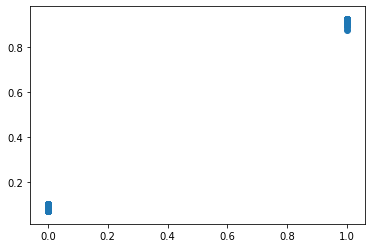

In [14]:
#plot predictions for variable
plt.scatter(Y, svr.predict(X))
plt.show()

In [15]:
#get R-squared value for updated model
svr.score(X, Y)

0.9547899810337226

In [16]:
#check for overfitting
cross_val_score(svr, X, Y, cv=5)

C:\Users\rkies\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\rkies\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\rkies\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\rkies\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

array([0.95445257, 0.95409173, 0.95496959, 0.95653129, 0.95361133])

By changing the problem to a classification problem where we sort the recipes into those with ratings above 3.5 and those with ratings less than or equal to 3.5 and limiting the feature set to the 30 most impactful features, we were able to improve the classifier to obtain an R-squared value of 0.95. Something notable about the features that were the most highly correlated with the high rating variable was that many of them had to do with drinking, such as alcoholic, gin, rum, and cocktail. As nonalcoholic was also one of the most highly correlated features, drinks might be more likely to be rated higher, perhaps because they can be easier to make. There were also words that might indicate allergen-free cooking, like soy free, peanut free, and tree nut free.